In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [13]:
data_df = pd.read_csv("2.demat_account_past_60_months.csv")

In [14]:
data_df.columns = ["Month", "DEMAT_accounts"]


# Convert the 'Month' column to a datetime object and create additional time features

In [15]:
data_df['Date'] = pd.to_datetime(data_df['Month'], format='%b-%y')

start_date = pd.to_datetime('January-2000', format='%B-%Y')


# Calculate the elapsed time in months from the start date and other relevant columns

In [16]:
data_df['Elapsed Time (Months)'] = ((data_df['Date'].dt.year - start_date.year) * 12
                                    + data_df['Date'].dt.month - start_date.month)
data_df['Month_Number'] = data_df['Date'].dt.month
data_df['Year'] = data_df['Date'].dt.year
data_df['Previous_Month_Account'] = data_df['DEMAT_accounts'].shift(-1)

# Drop unnecessary columns for training the model

In [17]:
data_2 = data_df.drop(["Month", "Date", "Previous_Month_Account"], axis=1)

# Prepare the features (X) and the target variable (y)

In [18]:
X = data_2[['Elapsed Time (Months)', 'Month_Number', 'Year']]
y = data_df['DEMAT_accounts']

# Handle missing data

In [19]:
  X = X.dropna()
y = y[X.index]

# Split the data into training and testing sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the Linear Regression model

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()


# Make predictions on the test set

In [22]:
y_pred = model.predict(X_test)


# Output the predictions and model coefficients

In [23]:
print(f"Reg No. 21BBS0166 - Predictions on test set: {y_pred}")
print(f"Reg No. 21BBS0166 - Model coefficients: {model.coef_}")
print(f"Reg No. 21BBS0166 - Model intercept: {model.intercept_}")

Reg No. 21BBS0166 - Predictions on test set: [133.875    123.59375   45.375     73.875    109.015625  27.796875
  68.40625   39.90625  110.84375   56.3125    70.234375  20.515625
 102.390625]
Reg No. 21BBS0166 - Model coefficients: [-3.81905364e+09  3.81905364e+09  4.58286437e+10]
Reg No. 21BBS0166 - Model intercept: -91661106431936.77


# Calculate the R-squared value to evaluate model performance

In [24]:
r2 = r2_score(y_test, y_pred)
print(f"Reg No. 21BBS0166 - R-squared (model accuracy): {r2}")

Reg No. 21BBS0166 - R-squared (model accuracy): 0.9494286615243005


# Predict DEMAT accounts for January 2025

In [31]:
input_data = {
    'Elapsed Time (Months)': [300],  # Adjust this based on elapsed months till Jan 2025
    'Month_Number': [1],  # January
    'Year': [2025],
}
input_df = pd.DataFrame(input_data)
predicted_demat_accounts = model.predict(input_df)

print(f"Reg No. 21BBS0166")
print(f"Predicted DEMAT accounts for January 2025 (in millions): {predicted_demat_accounts[0]}")

Reg No. 21BBS0166
Predicted DEMAT accounts for January 2025 (in millions): 155.09375


# Plot the actual and predicted values

(array([17532., 17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

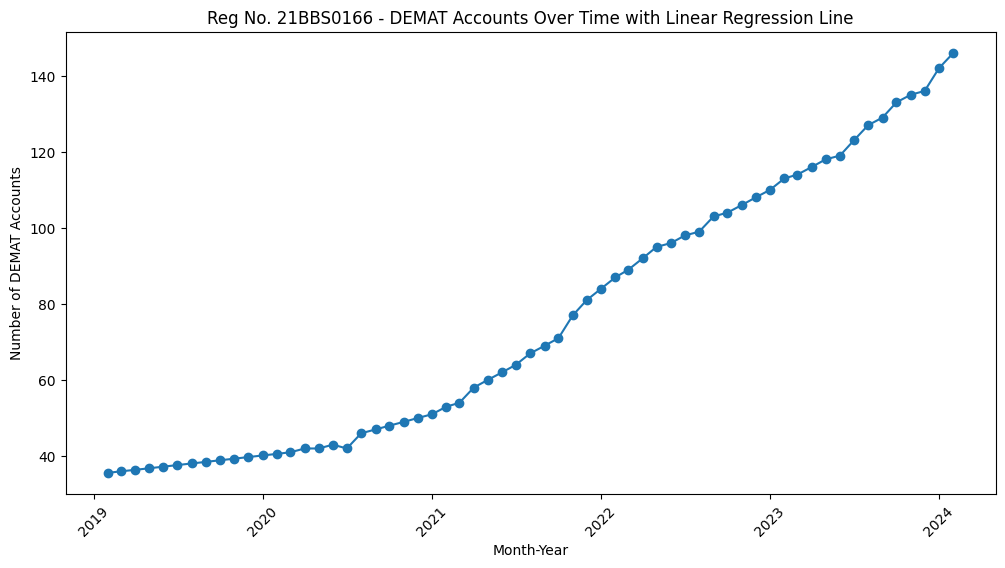

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(data_df['Date'], data_df['DEMAT_accounts'], marker='o', label='Actual DEMAT Accounts')
plt.title('Reg No. 21BBS0166 - DEMAT Accounts Over Time with Linear Regression Line')
plt.xlabel('Month-Year')
plt.ylabel('Number of DEMAT Accounts')
plt.xticks(rotation=45)

# Calculate the predicted values for the plot

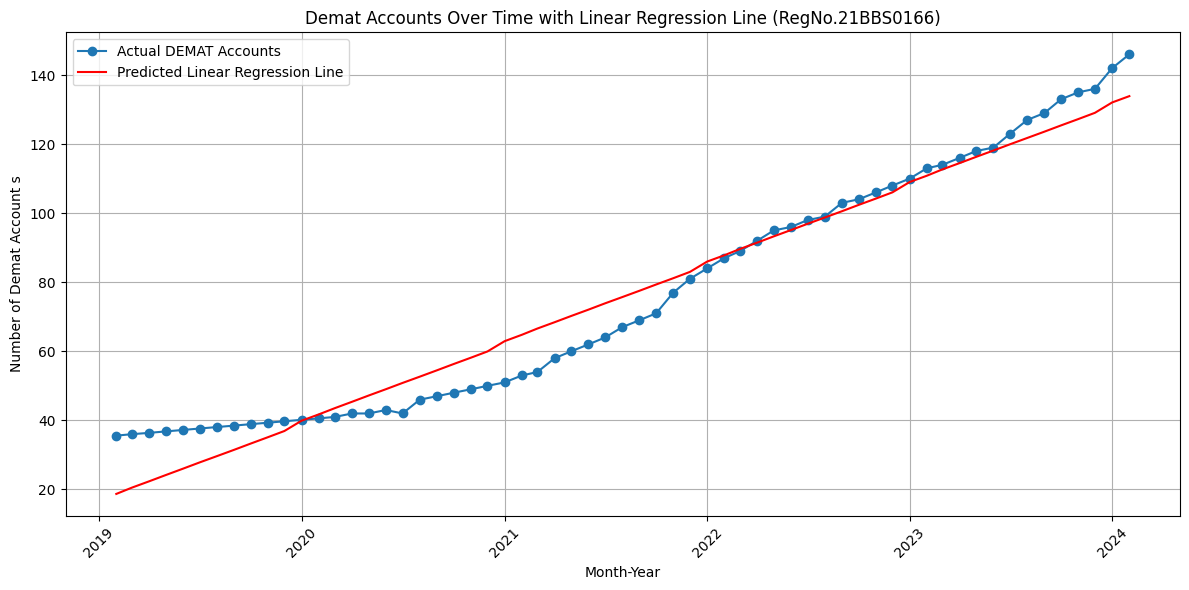

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(data_df['Date'], data_df['DEMAT_accounts'], marker='o', label='Actual DEMAT Accounts')
plt.plot(data_df['Date'], predicted_accounts, color='red', label='Predicted Linear Regression Line')

# Customize the plot
plt.title('Demat Accounts Over Time with Linear Regression Line (RegNo.21BBS0166)')
plt.xlabel('Month-Year')
plt.ylabel('Number of Demat Account s')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Display the plot
plt.show()